In [27]:
import math
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

Symmetric Random Walk


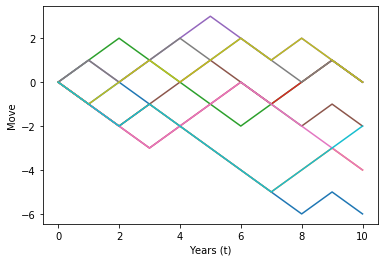

In [28]:
# Parameters
M = 10 # number of simulations
t = 10 # Time

random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M,t)).T
origin = np.zeros((1,M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

plt.plot(rw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [29]:
# Create Quadratic variation and Variance functions 
quadratic_variation = lambda x: round(np.square(x[:-1]-x[1:]).sum(),3)
variance = lambda x: round(np.var(x,axis=0),3)

[quadratic_variation(path) for path in rw_paths.T[:4]]
[variance(path) for path in rw_paths[1:11]]

[0.84, 1.76, 2.24, 2.44, 3.84, 5.76, 5.64, 6.44, 4.8, 4.36]

Scaled Symmetric Random Walk

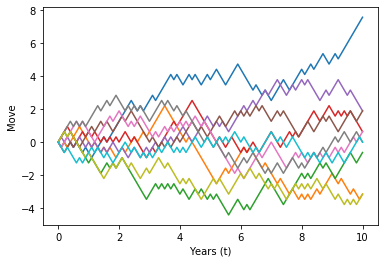

In [30]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 10

random_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size=(M,t*n)).T
origin = np.zeros((1,M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

time = np.linspace(0,t,t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt = tt.T
# print(np.size(tt),np.size(srw_paths))
plt.plot(tt,srw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

Limit of Binomial Distribution

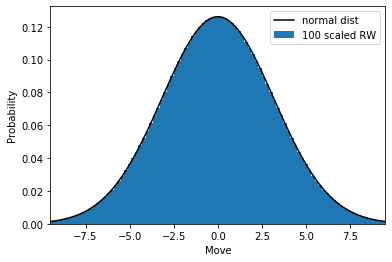

In [31]:
n = 100
t = 10

# Combinations
def nCr(n,k):
    f = math.factorial
    return f(n) / (f(k) * f(n-k))

perms = [nCr(n*t,k)*(0.5)**(n*t) for k in range(int(n*t)+1)]

W_nt = lambda n,t: 1/np.sqrt(n) * np.arange(-n*t,n*t+1,2)

outcomes = W_nt(n,t)
plt.bar(outcomes,[perm/(outcomes[1]-outcomes[0]) for perm in perms],outcomes[1]-outcomes[0], 
        label='{0} scaled RW'.format(n))

x = np.linspace(-3*np.sqrt(t), 3*np.sqrt(t), 100)
plt.plot(x, stats.norm.pdf(x, 0, np.sqrt(t)), 'k-',label='normal dist')

plt.xlim(-3*np.sqrt(t),3*np.sqrt(t))
plt.ylabel("Probability")
plt.xlabel("Move")
plt.legend()
plt.show()

Brownian Motion - sampling at specific time steps n

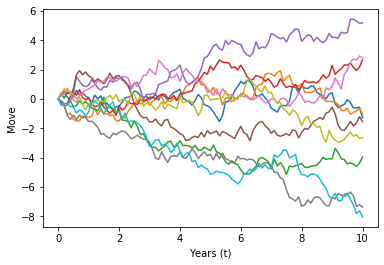

In [32]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 100 # steps we want to see
dt = t/n # time step

steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
origin = np.zeros((1,M))
bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)


time = np.linspace(0,t,n+1)
tt = np.full(shape=(M, n+1), fill_value=time)
tt = tt.T

plt.plot(tt,bm_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()